<a href="https://colab.research.google.com/github/Cherryberry112/CSE475_Machine_Learning-/blob/main/Lab/lab01_DecisionTree_RandomForest_Mushroom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# 2. VISUAL THEME (Personalized)

In [2]:
sns.set_theme(style="whitegrid")
sns.set_palette("pink")
plt.rcParams["figure.figsize"] = (8, 5)

# 3. LOAD DATASET

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = [
    "target","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color",
    "stalk-shape","stalk-root","stalk-surface-above-ring",
    "stalk-surface-below-ring","stalk-color-above-ring",
    "stalk-color-below-ring","veil-type","veil-color",
    "ring-number","ring-type","spore-print-color","population","habitat"
]

data = pd.read_csv(url, names=columns)
df = pd.DataFrame(data)

print(df.head().T)
df.info()
df.describe(include="all")


                          0  1  2  3  4
target                    p  e  e  p  e
cap-shape                 x  x  b  x  x
cap-surface               s  s  s  y  s
cap-color                 n  y  w  w  g
bruises                   t  t  t  t  f
odor                      p  a  l  p  n
gill-attachment           f  f  f  f  f
gill-spacing              c  c  c  c  w
gill-size                 n  b  b  n  b
gill-color                k  k  n  n  k
stalk-shape               e  e  e  e  t
stalk-root                e  c  c  e  e
stalk-surface-above-ring  s  s  s  s  s
stalk-surface-below-ring  s  s  s  s  s
stalk-color-above-ring    w  w  w  w  w
stalk-color-below-ring    w  w  w  w  w
veil-type                 p  p  p  p  p
veil-color                w  w  w  w  w
ring-number               o  o  o  o  o
ring-type                 p  p  p  p  e
spore-print-color         k  n  n  k  n
population                s  n  n  s  a
habitat                   u  g  m  u  g
<class 'pandas.core.frame.DataFrame'>
Ra

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 5. DATA CLEANING

In [10]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# 6. ENCODING CATEGORICAL FEATURES

In [11]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("\nAFTER ENCODING")
print(df.head().T)
print(df.info())


AFTER ENCODING
                          0  1  2  3  4
target                    1  0  0  1  0
cap-shape                 5  5  0  5  5
cap-surface               2  2  2  3  2
cap-color                 4  7  6  6  3
bruises                   1  1  1  1  0
odor                      6  0  3  6  5
gill-attachment           1  1  1  1  1
gill-spacing              0  0  0  0  1
gill-size                 1  0  0  1  0
gill-color                2  2  3  3  2
stalk-shape               0  0  0  0  1
stalk-root                2  1  1  2  2
stalk-surface-above-ring  2  2  2  2  2
stalk-surface-below-ring  2  2  2  2  2
stalk-color-above-ring    5  5  5  5  5
stalk-color-below-ring    5  5  5  5  5
veil-type                 0  0  0  0  0
veil-color                0  0  0  0  0
ring-number               1  1  1  1  1
ring-type                 3  3  3  3  0
spore-print-color         1  2  2  1  2
population                3  2  2  3  0
habitat                   5  1  3  5  1
<class 'pandas.core.fram


## POST-ENCODING VISUAL ANALYSIS


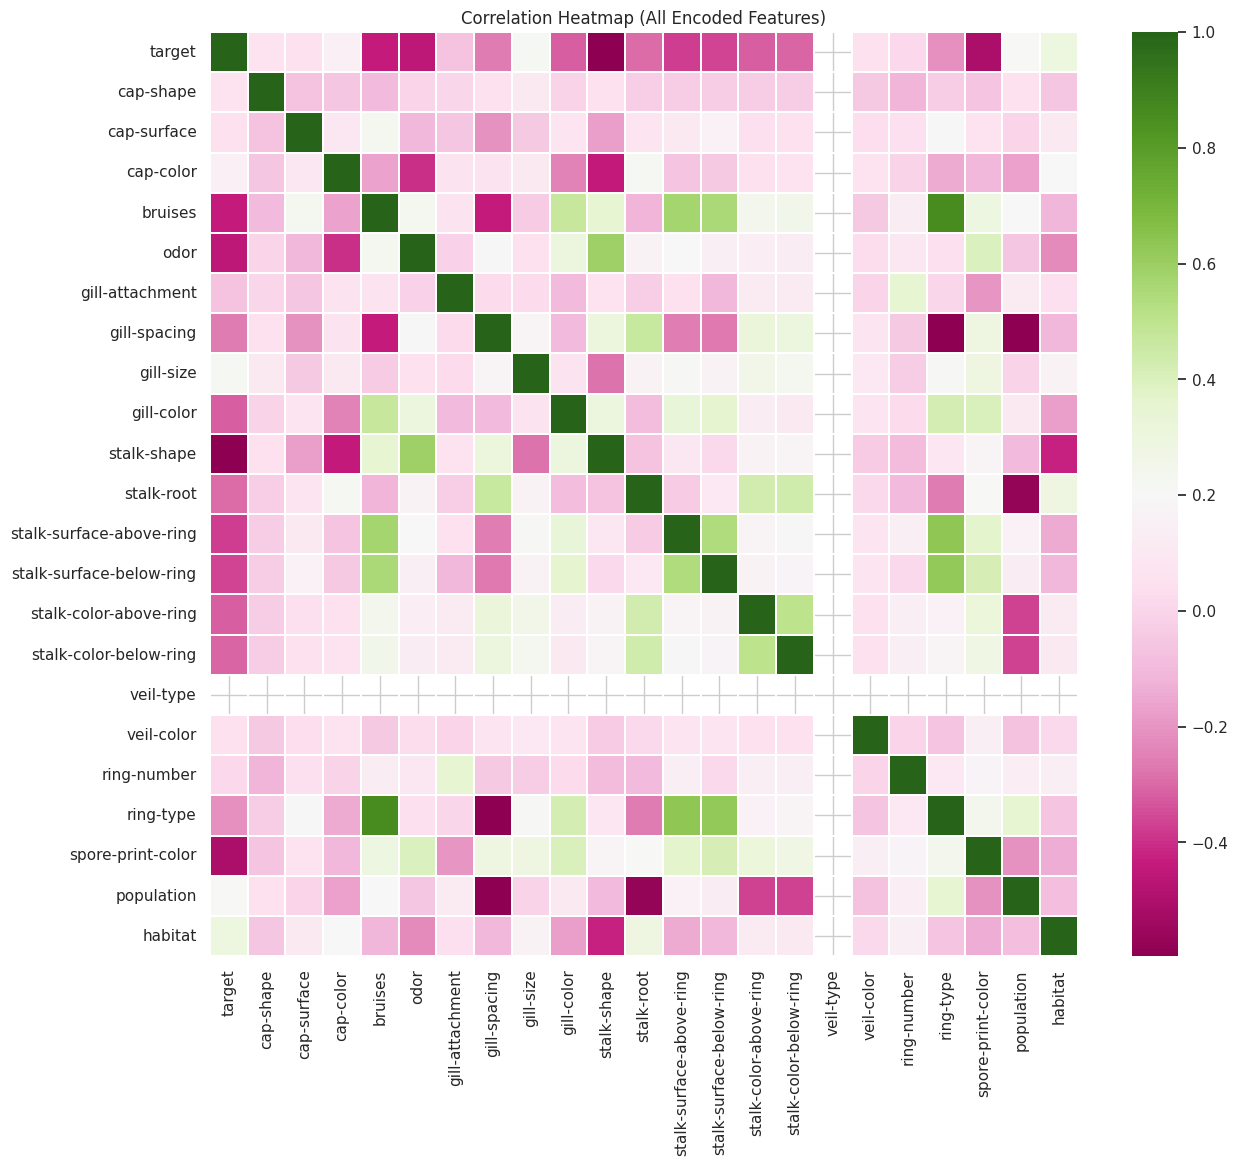

In [20]:
# -------------------------
# 1. CORRELATION HEATMAP
# -------------------------
plt.figure(figsize=(14, 12))
corr = df.corr()

sns.heatmap(
    corr,
    cmap="PiYG",
    linewidths=0.3,
    cbar=True
)

plt.title("Correlation Heatmap (All Encoded Features)")
plt.show()


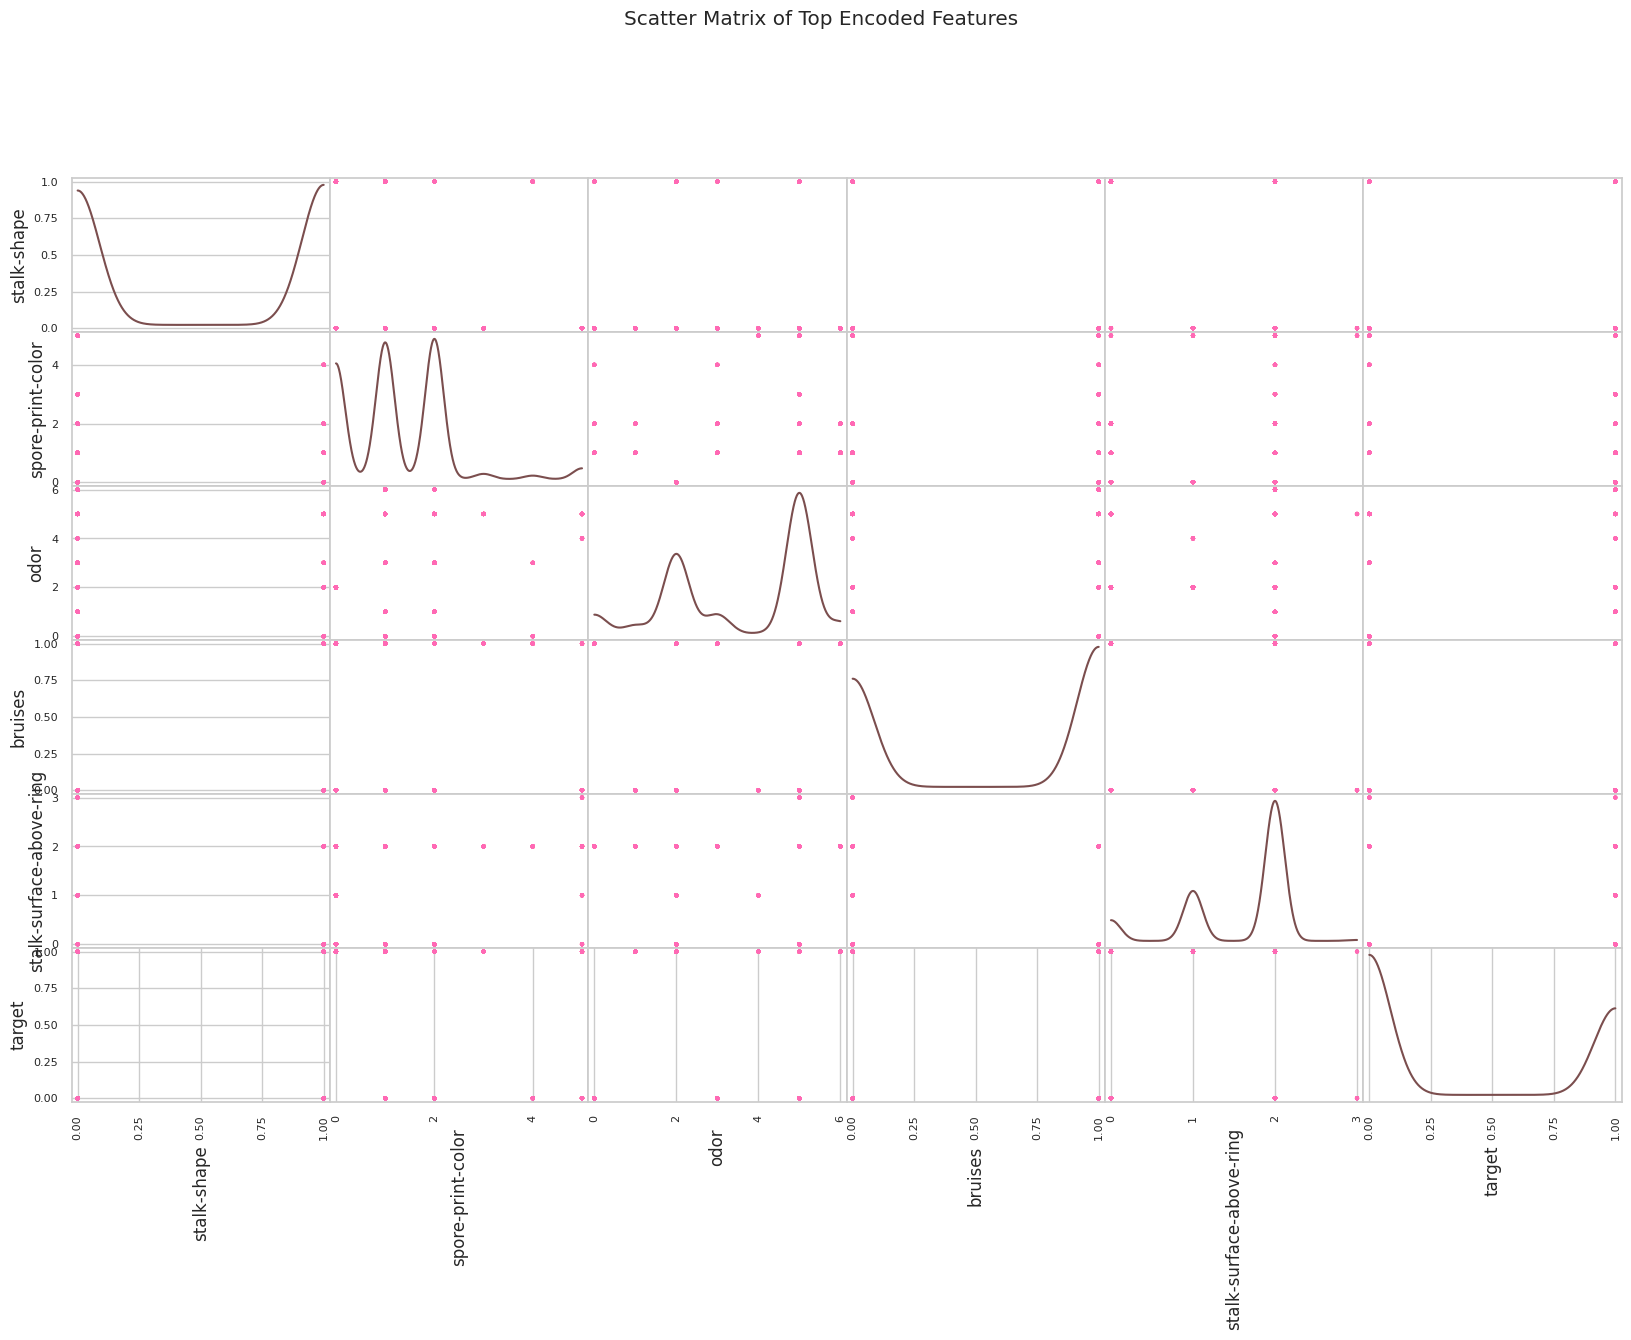

In [25]:
# =================
# SCATTER MATRIX
# =================

top_features = (
    corr["target"]
    .abs()
    .sort_values(ascending=False)
    .index[1:6]   # top 5 features excluding target
)

scatter_df = df[top_features.tolist() + ["target"]]

axes = pd.plotting.scatter_matrix(
    scatter_df,
    figsize=(20, 12),
    diagonal="kde",
    alpha=0.6,
    color="hotpink"
)
# Rotate axis labels for readability
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)   # vertical x-axis labels


plt.suptitle("Scatter Matrix of Top Encoded Features", y=1.02)
plt.show()